In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
%matplotlib inline

<Figure size 800x600 with 0 Axes>

In [37]:
df = pd.read_csv('gemstone.csv')
df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [21]:
df.shape

(193573, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [23]:
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [24]:
df.isna().sum() # Check for null values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
df.duplicated().sum() # Check for duplicated values 

0

In [40]:
df = df.drop(labels=['id'], axis=1)
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [27]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [28]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [29]:
df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [30]:
cat_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[df.dtypes != 'object']
print('Categorical Columns:', cat_cols)
print('Numerical Columns:', num_cols)

Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')
Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


<Axes: >

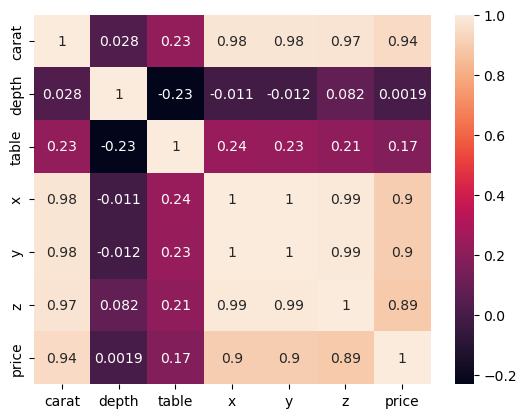

In [32]:
## correlation
sns.heatmap(df[num_cols].corr(),annot=True)

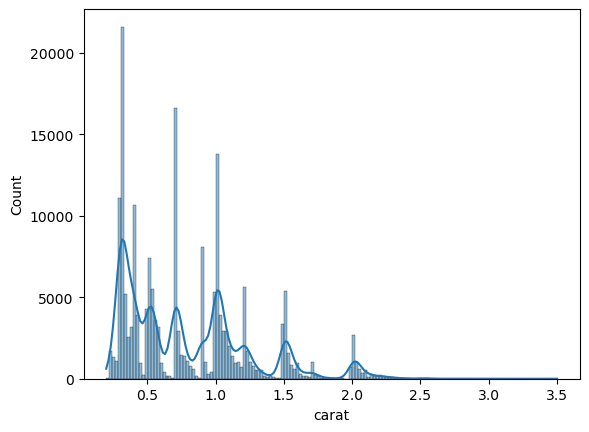

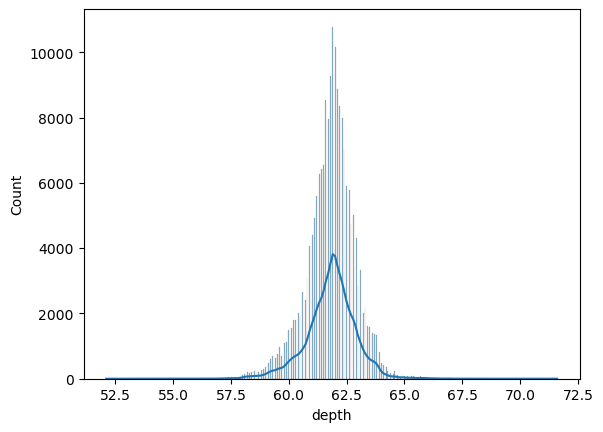

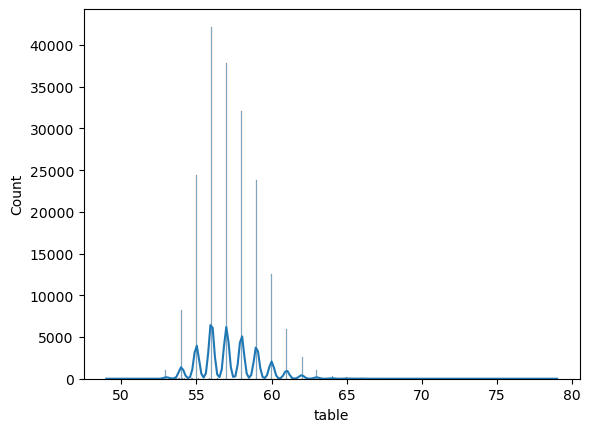

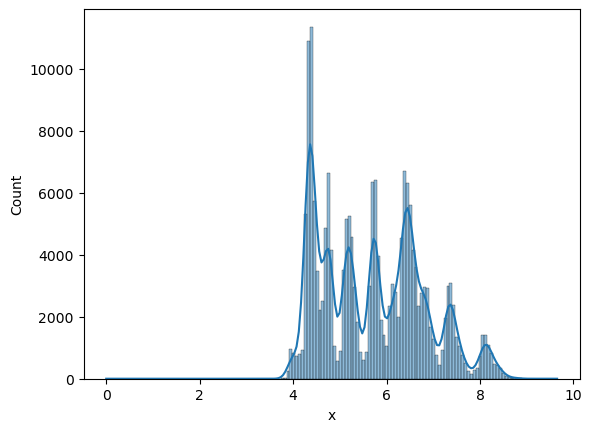

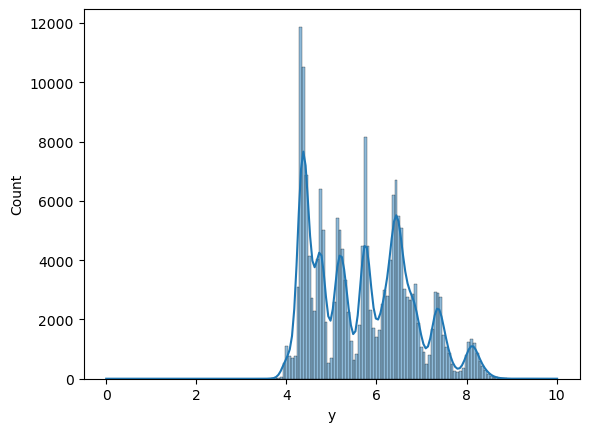

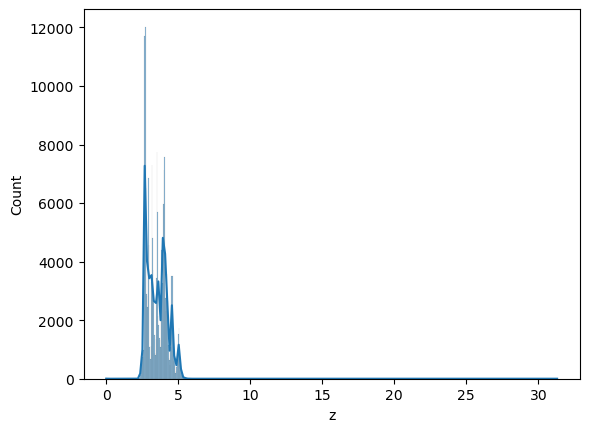

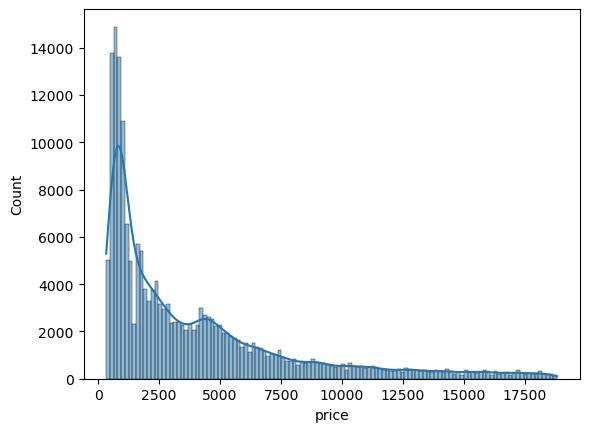

In [33]:
x=0
for i in num_cols:
    sns.histplot(data = df,x = i,kde = True)
    print('\n')
    plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453
5,1.51,4,6,2,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,2,1,5,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,3,3,3,62.5,57.0,7.00,7.05,4.38,6224
8,0.30,2,2,1,62.0,56.0,4.35,4.37,2.70,886
9,0.30,1,6,4,63.6,57.0,4.26,4.28,2.72,421


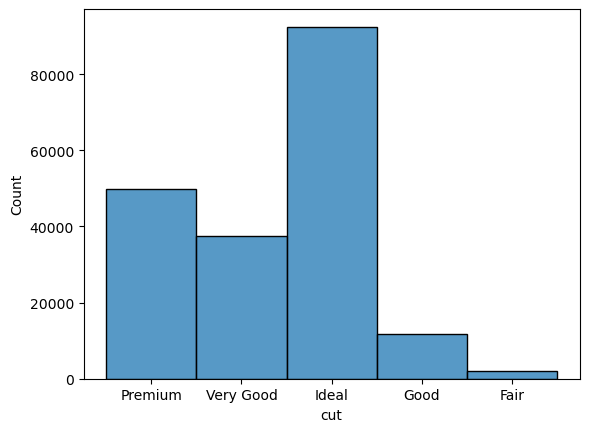

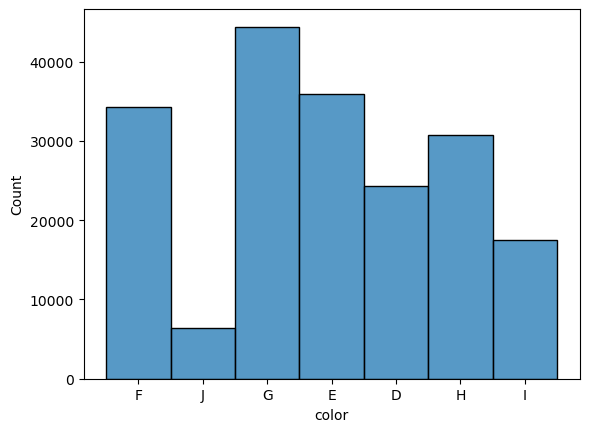

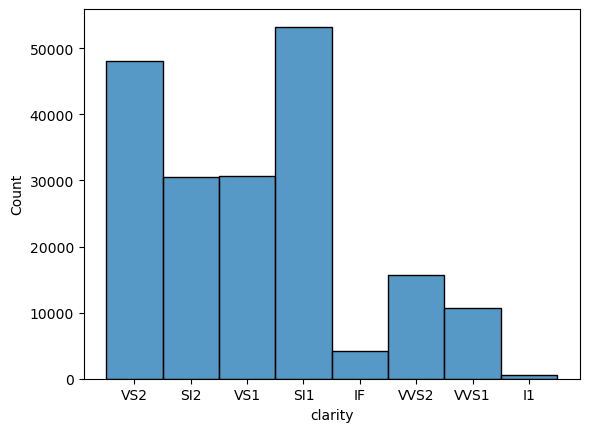

In [39]:
x=0
for i in cat_cols:
    sns.histplot(data = df,x = i,kde = False)
    print('\n')
    plt.show()